<a href="https://colab.research.google.com/github/G-Shivani973/FMML_Projects/blob/main/Mod4_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FMML Module 4 Lab 1

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Load the Sonar dataset

In [2]:
sonar = datasets.fetch_openml(name="sonar", version=1)
X, y = sonar.data, sonar.target


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Convert labels to binary (-1 and 1)

In [3]:
y = np.where(y == 'R', -1, 1)


Split the dataset into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Add a bias term to the input data

In [5]:
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))


In [9]:
def perceptron_algo(X, Y):
    w = np.zeros(X.shape[1])
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]

    return w

def plot_error(X, y, w):
    errors = []
    for i in range(X.shape[0]):
        if (np.dot(X[i], w) * y[i]) <= 0:
            errors.append(np.dot(X[i], w) * y[i])

    plt.plot(errors)
    plt.xlabel('Test Sample')
    plt.ylabel('Error')
    plt.title('Perceptron Algorithm - Test Set')
    plt.show()


Apply perceptron algorithm and plot the error

In [11]:
w = perceptron_algo(X_train, y_train)

Plot the error for the test set

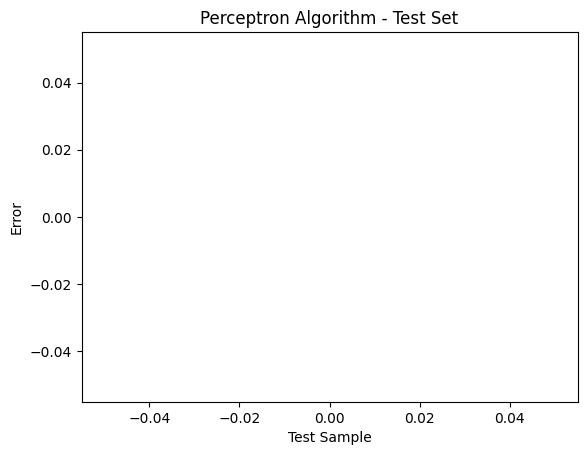

In [12]:
plot_error(X_test, y_test, w)

###Question 2
Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

In [13]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


 Load the Sonar dataset

In [14]:
sonar = datasets.fetch_openml(name="sonar", version=1)
X, y = sonar.data, sonar.target


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Convert labels to binary (-1 and 1)

In [15]:
y = np.where(y == 'R', -1, 1)


Split the dataset into training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Add a bias term to the input data

In [17]:
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

def perceptron_algo(X, Y, eta=1, epochs=10):
    w = np.zeros(X.shape[1])

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]

    return w

def plot_error(X, y, w):
    errors = []
    for i in range(X.shape[0]):
        if (np.dot(X[i], w) * y[i]) <= 0:
            errors.append(np.dot(X[i], w) * y[i])

    plt.plot(errors)
    plt.xlabel('Test Sample')
    plt.ylabel('Error')
    plt.title('Perceptron Algorithm - Test Set')
    plt.show()


Experiment with different learning rates

In [18]:
learning_rates = [0.1, 1, 10]


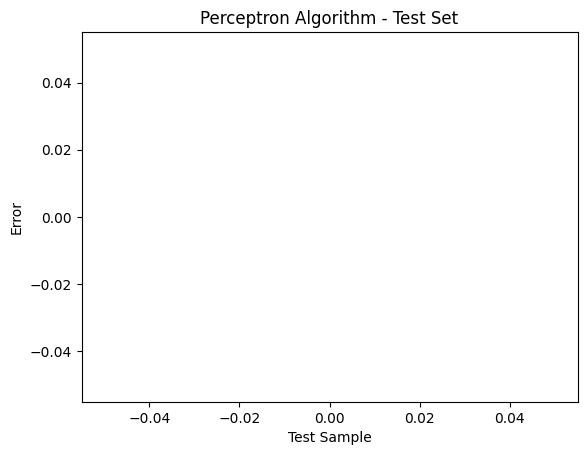

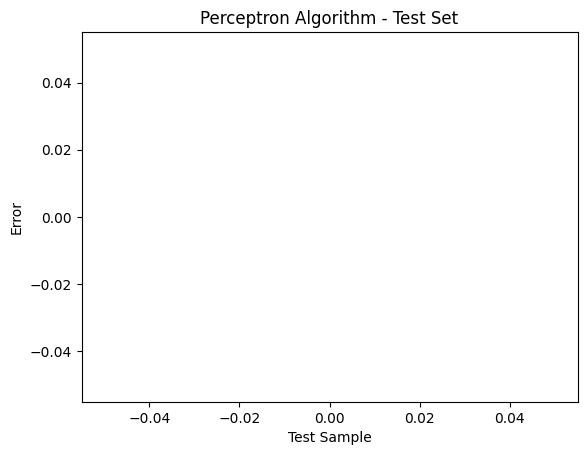

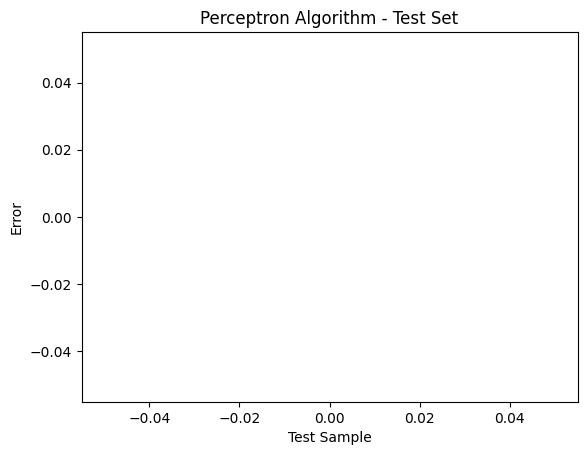

In [19]:
for eta in learning_rates:
    w = perceptron_algo(X_train, y_train, eta=eta)
    plot_error(X_test, y_test, w)

####Question 3:
Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

In [20]:
import numpy as np
import matplotlib.pyplot as plt


Create a non-linearly separable toy dataset

In [22]:
np.random.seed(42)
X = np.random.rand(100, 2) * 2 - 1
y = np.sign(X[:, 0]**2 + X[:, 1]**2 - 0.8)

Convert 0 labels to -1

In [23]:
y[y == 0] = -1


Add a bias term to the input data

In [24]:
X = np.hstack((X, np.ones((X.shape[0], 1))))


In [25]:
def perceptron_algo(X, Y, eta=1, epochs=100):
    w = np.zeros(X.shape[1])

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]

    return w

def plot_decision_boundary(X, y, w):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    xy = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape[0])]

    Z = np.dot(xy, w)
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='blue')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Algorithm - Decision Boundary')
    plt.show()


Apply perceptron algorithm

In [26]:
w = perceptron_algo(X, y)


Plot the decision boundary

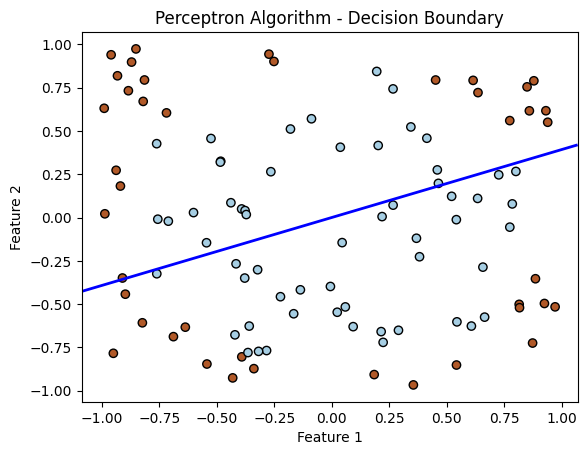

In [27]:
plot_decision_boundary(X[:, :2], y, w)